In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("./data_lstm.csv")
data.head(10)

,time,p,avg,rms,min,max,min_lb,max_lb,shape,location,scale
0,0.00000,-0.420133,-0.420133,0.000000,-0.420133,-0.420133,-0.420133,-0.420133,-0.662855,-0.420133,1.560864e-17
1,0.22498,-0.398210,-0.409172,0.010961,-0.420133,-0.398210,-0.420133,-0.398210,1.258009,-0.403388,6.513435e-03
2,0.44998,-0.392214,-0.403519,0.012000,-0.420133,-0.392214,-0.420133,-0.392214,1.143411,-0.399018,7.779624e-03
3,0.67496,-0.442743,-0.413325,0.019912,-0.442743,-0.392214,-0.442743,-0.392214,1.189356,-0.409371,2.040542e-02
4,0.89993,-0.488844,-0.428429,0.035067,-0.488844,-0.392214,-0.488844,-0.392214,1.205695,-0.420634,3.426537e-02
5,1.12491,-0.484030,-0.437696,0.038133,-0.488844,-0.392214,-0.488844,-0.392214,1.226224,-0.434421,5.175496e-02
6,1.34991,-0.455369,-0.440221,0.035842,-0.488844,-0.392214,-0.488844,-0.392214,1.105901,-0.430141,4.194376e-02
7,1.57488,-0.440763,-0.440288,0.033527,-0.488844,-0.392214,-0.488844,-0.392214,1.094388,-0.438688,5.086110e-02
8,1.79986,-0.434161,-0.439608,0.031668,-0.488844,-0.392214,-0.488844,-0.392214,0.524578,-0.446945,3.473578e-02
9,2.02488,-0.395872,-0.435234,0.032783,-0.488844,-0.392214,-0.488844,-0.392214,1.059071,-0.435083,4.540177e-02


In [9]:
data['TargetNextClose'] = data['p'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)

In [10]:
data_set = data.iloc[:, 0:13]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)

,index,time,p,avg,rms,min,max,min_lb,max_lb,shape,location,scale,TargetNextClose
0,0,0.00000,-0.420133,-0.420133,0.000000,-0.420133,-0.420133,-0.420133,-0.420133,-0.662855,-0.420133,1.560864e-17,-0.398210
1,1,0.22498,-0.398210,-0.409172,0.010961,-0.420133,-0.398210,-0.420133,-0.398210,1.258009,-0.403388,6.513435e-03,-0.392214
2,2,0.44998,-0.392214,-0.403519,0.012000,-0.420133,-0.392214,-0.420133,-0.392214,1.143411,-0.399018,7.779624e-03,-0.442743
3,3,0.67496,-0.442743,-0.413325,0.019912,-0.442743,-0.392214,-0.442743,-0.392214,1.189356,-0.409371,2.040542e-02,-0.488844
4,4,0.89993,-0.488844,-0.428429,0.035067,-0.488844,-0.392214,-0.488844,-0.392214,1.205695,-0.420634,3.426537e-02,-0.484030
5,5,1.12491,-0.484030,-0.437696,0.038133,-0.488844,-0.392214,-0.488844,-0.392214,1.226224,-0.434421,5.175496e-02,-0.455369
6,6,1.34991,-0.455369,-0.440221,0.035842,-0.488844,-0.392214,-0.488844,-0.392214,1.105901,-0.430141,4.194376e-02,-0.440763
7,7,1.57488,-0.440763,-0.440288,0.033527,-0.488844,-0.392214,-0.488844,-0.392214,1.094388,-0.438688,5.086110e-02,-0.434161
8,8,1.79986,-0.434161,-0.439608,0.031668,-0.488844,-0.392214,-0.488844,-0.392214,0.524578,-0.446945,3.473578e-02,-0.395872
9,9,2.02488,-0.395872,-0.435234,0.032783,-0.488844,-0.392214,-0.488844,-0.392214,1.059071,-0.435083,4.540177e-02,-0.374060


In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.00000000e+00 0.00000000e+00 4.55565481e-01 ... 1.70613104e-01
  0.00000000e+00 4.74273521e-01]
 [1.85219485e-04 1.85215206e-04 4.74273521e-01 ... 2.77166544e-01
  1.62614862e-02 4.79390636e-01]
 [3.70438970e-04 3.70446878e-04 4.79390636e-01 ... 3.04974606e-01
  1.94226630e-02 4.36270606e-01]
 ...
 [9.99629561e-01 9.99629537e-01 7.10060562e-01 ... 8.48205810e-01
  3.37937265e-01 7.37242386e-01]
 [9.99814781e-01 9.99814768e-01 7.37242386e-01 ... 8.48467712e-01
  3.37967716e-01 7.78601945e-01]
 [1.00000000e+00 1.00000000e+00 7.78601945e-01 ... 8.48651553e-01
  3.38012788e-01 7.64236424e-01]]


In [12]:
# multiple feature from data provided to the model
X = []

backcandles = 10
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))

5400


In [13]:
splitlimit = int(len(X)*0.1)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

539
(539, 10, 8)
(4851, 10, 8)
(539, 1)
(4851, 1)
[[0.48453124]
 [0.46622226]
 [0.4960096 ]
 [0.52535093]
 [0.56964462]
 [0.58288342]
 [0.58166283]
 [0.51924793]
 [0.48967186]
 [0.5215248 ]
 [0.56971506]
 [0.57368199]
 [0.56821276]
 [0.58896298]
 [0.62149665]
 [0.67686963]
 [0.65180039]
 [0.67945167]
 [0.72461387]
 [0.67048496]
 [0.6564011 ]
 [0.62330408]
 [0.5709826 ]
 [0.56631145]
 [0.60276513]
 [0.65363129]
 [0.63360875]
 [0.60152106]
 [0.59466691]
 [0.58100559]
 [0.566687  ]
 [0.54931695]
 [0.55941036]
 [0.58706166]
 [0.57429229]
 [0.55919911]
 [0.53882446]
 [0.53870712]
 [0.54612462]
 [0.53074976]
 [0.52563262]
 [0.51701799]
 [0.49511761]
 [0.479954  ]
 [0.45218534]
 [0.44277266]
 [0.47516549]
 [0.50502325]
 [0.50258205]
 [0.49441341]
 [0.49314587]
 [0.47274776]
 [0.48307593]
 [0.46652739]
 [0.42986245]
 [0.4453312 ]
 [0.51051594]
 [0.50387307]
 [0.4948594 ]
 [0.51039857]
 [0.52605513]
 [0.54936388]
 [0.52478757]
 [0.498263  ]
 [0.51469415]
 [0.53389512]
 [0.58344678]
 [0.49361532

In [14]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
33/33 [==============================] - 2s 19ms/step - loss: 0.0316 - val_loss: 0.0056
Epoch 2/30
33/33 [==============================] - 0s 6ms/step - loss: 0.0102 - val_loss: 0.0086
Epoch 3/30
33/33 [==============================] - 0s 5ms/step - loss: 0.0067 - val_loss: 0.0020
Epoch 4/30
33/33 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.0031
Epoch 5/30
33/33 [==============================] - 0s 5ms/step - loss: 0.0053 - val_loss: 0.0023
Epoch 6/30
33/33 [==============================] - 0s 5ms/step - loss: 0.0052 - val_loss: 0.0040
Epoch 7/30
33/33 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.0022
Epoch 8/30
33/33 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.0072
Epoch 9/30
33/33 [==============================] - 0s 5ms/step - loss: 0.0041 - val_loss: 0.0034
Epoch 10/30
33/33 [==============================] - 0s 6ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 11/30
33/33 

In [15]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

152/152 [==============================] - 1s 3ms/step
[0.56690145] [0.53952866]
[0.57500035] [0.55218066]
[0.5881629] [0.58445614]
[0.6037638] [0.60605136]
[0.6275423] [0.62659031]
[0.6530993] [0.65550914]
[0.67772436] [0.69264354]
[0.7040203] [0.71991925]
[0.73503244] [0.72306465]
[0.7658477] [0.72085818]


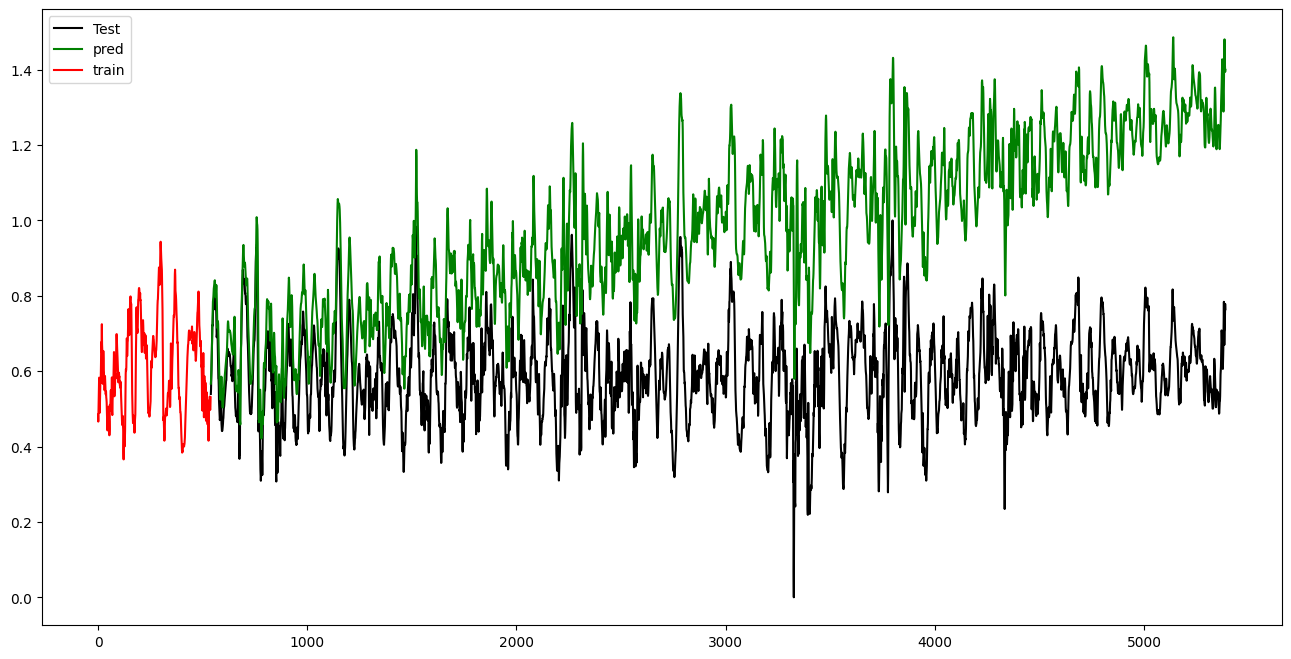

In [16]:
plt.figure(figsize=(16,8))
plt.plot([i + len(y_train) for i in range(len(y_test))], y_test, color = 'black', label = 'Test')
plt.plot([i + len(y_train) for i in range(len(y_pred))], y_pred, color = 'green', label = 'pred')
plt.plot([i for i in range(len(y_train))], y_train, color = 'red', label = 'train')
# plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

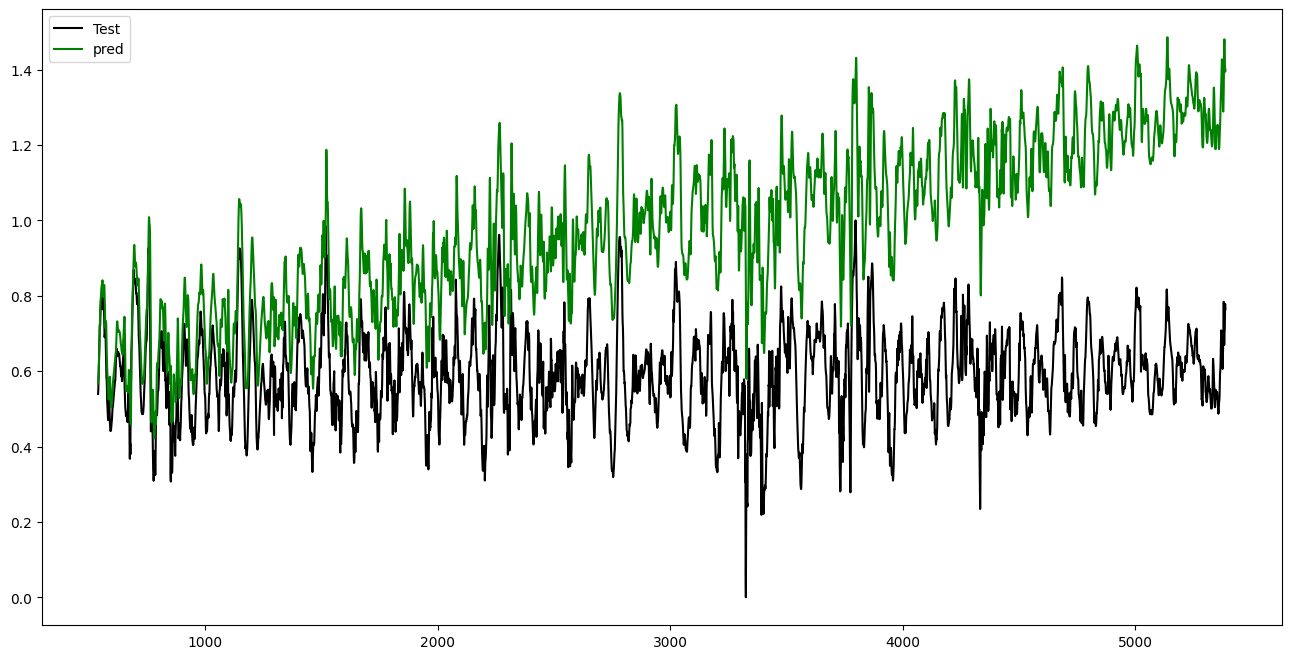

In [17]:
plt.figure(figsize=(16,8))
plt.plot([i + len(y_train) for i in range(len(y_test))], y_test, color = 'black', label = 'Test')
plt.plot([i + len(y_train) for i in range(len(y_pred))], y_pred, color = 'green', label = 'pred')
# plt.plot([i for i in range(len(y_train))], y_train, color = 'red', label = 'train')
# plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()